In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [17]:
# KNN Impletation from scratch

class kNNClassifier:
    
    # Initialization
    def __init__(self,k=3):
        self.k = k

    # calculting distance between two points
    def _euclidean_dist(self,x1,x2):
        return np.sqrt(np.sum((x1-x2) **2))

    # training the data - Lazy Learner - just memorizes the data
    def fit(self, X,y):
        self.X_train = X
        self.y_train = y

    # predict one nearest neighbor
    def _predict_one(self,x):

        # calculate distance from all the points and store in list
        distances = [self._euclidean_dist(x,x_train) for x_train in self.X_train]

        # sort the distances and store the indices of req no. of k neighbor
        knn_indices = np.argsort(distances)[:self.k]

        # find out the class the nearest neighbors belongs to
        # y train me x ki class value stored hai
        knn_classes = [self.y_train[i] for i in knn_indices]

        # find the majority calss
        majority_class = np.argmax(np.bincount(knn_classes))
        return majority_class

    # predict for all the points
    def predict(self,X):
        y_pred = [self._predict_one(x) for x in X]
        return np.array(y_pred)

In [18]:
# Data
X_train = np.array([
    [1,2],
    [2,3],
    [3,3],
    [6,5],
    [7,7]
])

y_train = np.array([0,0,0,1,1])

X_test = np.array([
    [2,2],
    [6,6]
])

model = kNNClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(y_pred)

[0 1]


In [3]:
# Vizualize

X_train_df = pd.DataFrame(X_train, columns =["x1" , "x2"])

X_train_df["label"] = y_train # create label column

In [4]:
X_train_df

,x1,x2,label
0,1,2,0
1,2,3,0
2,3,3,0
3,6,5,1
4,7,7,1


<Axes: xlabel='x1', ylabel='x2'>

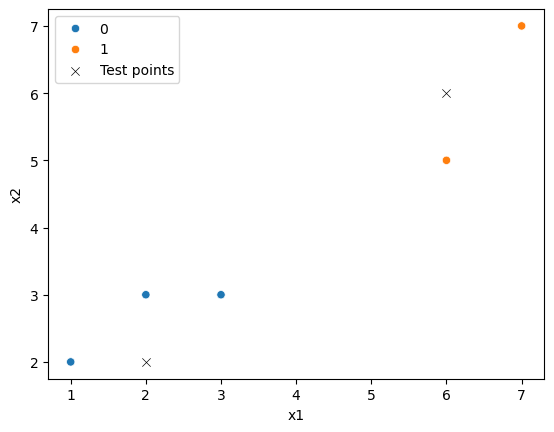

In [10]:
sns.scatterplot(
    data = X_train_df,
    x="x1",
    y="x2",
    hue = "label"
)
X_test_df =pd.DataFrame(X_test, columns = ["x1","x2"])

sns.scatterplot(
    data = X_test_df,
    x = "x1",
    y= "x2",
    color = "black",
    marker = "x",
    label = "Test points"
)